In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_quast = pd.read_csv('transposed_report.tsv', sep = '\t')

In [3]:
df_quast.head()

,Assembly,# contigs (>= 0 bp),# contigs (>= 1000 bp),# contigs (>= 5000 bp),# contigs (>= 10000 bp),# contigs (>= 25000 bp),# contigs (>= 50000 bp),Total length (>= 0 bp),Total length (>= 1000 bp),Total length (>= 5000 bp),...,Total length (>= 50000 bp),# contigs,Largest contig,Total length,GC (%),N50,N90,L50,L90,# N's per 100 kbp
0,GCA_016618195.1_ASM1661819v1_genomic,1,1,1,1,1,1,4342370,4342370,4342370,...,4342370,1,4342370,4342370,40.18,4342370,4342370,1,1,0.00
1,GCF_000154865.1_unplaced.scaf,52,52,33,20,17,14,4610361,4610361,4553196,...,4322170,52,2296384,4610361,41.28,361783,80245,2,11,147.49
2,GCF_000156395.1_unplaced.scaf,35,23,11,11,8,7,3978644,3970320,3944599,...,3863756,33,1070578,3977736,41.22,1018771,193416,2,5,316.76
3,GCF_000158055.1_unplaced.scaf,32,28,15,13,12,11,4764068,4761024,4739110,...,4689729,32,2110066,4764068,40.14,446177,164991,2,9,304.36
4,GCF_000173415.1_ASM17341v1_genomic,79,52,38,34,27,24,4029346,4014144,3982312,...,3703563,79,351794,4029346,41.84,205321,52405,8,23,0.74


Check the variability in assemblies quality 

<AxesSubplot:>

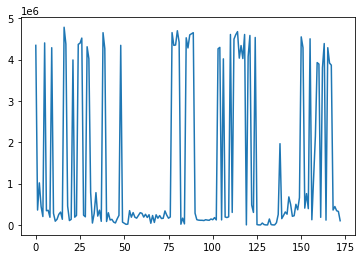

In [5]:
# based on N50 metric
df_quast['N50'].plot()

<AxesSubplot:>

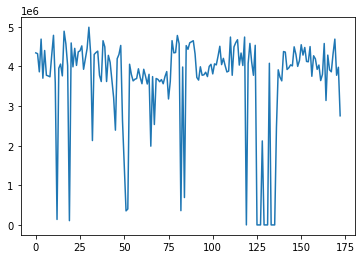

In [6]:
# based on Total length (>= 50000 bp) metric
df_quast['Total length (>= 50000 bp)'].plot()

In [7]:
# Select assemblies which N50 is not higher than 25% quantile

lst_assembly_N50 = df_quast[df_quast['N50'] <= df_quast['N50'].quantile(q=.25)]['Assembly']

In [8]:
# Select assemblies which 'Total length (>= 50000 bp)' < 25% quantile

lst_assembly_TotLen = df_quast[df_quast['Total length (>= 50000 bp)'] 
                               < df_quast['Total length (>= 50000 bp)'].quantile(q = .25)]['Assembly']

In [9]:
# Unite assemblies of poor quality (by N50 and by 'Total length (>= 50000 bp)')

lst_assemblies_N50_TotLen = list(set(lst_assembly_N50).union(set(lst_assembly_TotLen)))

In [10]:
# Select good assemblies

df_quast_good = df_quast[~df_quast['Assembly'].isin(lst_assemblies_N50_TotLen)]
df_quast_good.head()

,Assembly,# contigs (>= 0 bp),# contigs (>= 1000 bp),# contigs (>= 5000 bp),# contigs (>= 10000 bp),# contigs (>= 25000 bp),# contigs (>= 50000 bp),Total length (>= 0 bp),Total length (>= 1000 bp),Total length (>= 5000 bp),...,Total length (>= 50000 bp),# contigs,Largest contig,Total length,GC (%),N50,N90,L50,L90,# N's per 100 kbp
0,GCA_016618195.1_ASM1661819v1_genomic,1,1,1,1,1,1,4342370,4342370,4342370,...,4342370,1,4342370,4342370,40.18,4342370,4342370,1,1,0.00
1,GCF_000154865.1_unplaced.scaf,52,52,33,20,17,14,4610361,4610361,4553196,...,4322170,52,2296384,4610361,41.28,361783,80245,2,11,147.49
2,GCF_000156395.1_unplaced.scaf,35,23,11,11,8,7,3978644,3970320,3944599,...,3863756,33,1070578,3977736,41.22,1018771,193416,2,5,316.76
3,GCF_000158055.1_unplaced.scaf,32,28,15,13,12,11,4764068,4761024,4739110,...,4689729,32,2110066,4764068,40.14,446177,164991,2,9,304.36
4,GCF_000173415.1_ASM17341v1_genomic,79,52,38,34,27,24,4029346,4014144,3982312,...,3703563,79,351794,4029346,41.84,205321,52405,8,23,0.74


In [11]:
# Make in QUAST metadata additional column - 'Assembly ID'

df_quast_good['Assembly ID'] = df_quast_good['Assembly'].apply(lambda x: '_'.join(x.split('_')[0:2]))

In [12]:
# Save IDs of good assemblies as a list

lst_assemblies_good_IDs = df_quast_good['Assembly ID']

In [13]:
lst_assemblies_good_IDs.shape

(117,)

Put in correspondence NCBI and QUAST metadata to get organism strain

In [14]:
# NCBI summary data on Providencia

df_ncbi = pd.read_csv('data_summary.tsv', sep = '\t')
df_ncbi.head()

,Organism Scientific Name,Organism Common Name,Organism Qualifier,Taxonomy id,Assembly Name,Assembly Accession,Source,Annotation,Level,Contig N50,Size,Submission Date,Gene Count,BioProject,BioSample
0,Providencia vermicola,NaN,"isolate: soil, strain: LLDRA6",333965,ASM1661819v1,GCA_016618195.1,GenBank,From INSDC submitter,Complete Genome,4342370,4342370,2021-01-12,3966,PRJNA689887,SAMN17221518
1,Providencia stuartii ATCC 25827,NaN,strain: ATCC 25827,471874,ASM15486v1,GCF_000154865.1,RefSeq,From INSDC submitter,Scaffold,361783,4610361,2008-04-10,4371,PRJNA20553,SAMN00000020
2,Providencia rustigianii DSM 4541,NaN,strain: DSM 4541,500637,ASM15639v1,GCF_000156395.1,RefSeq,From INSDC submitter,Scaffold,249145,3978644,2009-10-02,3828,PRJNA28651,SAMN00008855
3,Providencia rettgeri DSM 1131,NaN,strain: DSM 1131,521000,ASM15805v1,GCF_000158055.1,RefSeq,From INSDC submitter,Scaffold,164189,4764068,2009-11-13,4480,PRJNA29299,SAMN00008854
4,Providencia alcalifaciens DSM 30120,NaN,strain: DSM 30120,520999,ASM17341v1,GCF_000173415.1,RefSeq,From INSDC submitter,Contig,205321,4029346,2008-10-23,3844,PRJNA29297,SAMN00008853


In [15]:
# Extract part of ncbi summary that corresponds to good assemblies

df_ncbi_good = df_ncbi.loc[df_ncbi["Assembly Accession"].isin(lst_assemblies_good_IDs)]
df_ncbi_good.head()

,Organism Scientific Name,Organism Common Name,Organism Qualifier,Taxonomy id,Assembly Name,Assembly Accession,Source,Annotation,Level,Contig N50,Size,Submission Date,Gene Count,BioProject,BioSample
0,Providencia vermicola,NaN,"isolate: soil, strain: LLDRA6",333965,ASM1661819v1,GCA_016618195.1,GenBank,From INSDC submitter,Complete Genome,4342370,4342370,2021-01-12,3966,PRJNA689887,SAMN17221518
1,Providencia stuartii ATCC 25827,NaN,strain: ATCC 25827,471874,ASM15486v1,GCF_000154865.1,RefSeq,From INSDC submitter,Scaffold,361783,4610361,2008-04-10,4371,PRJNA20553,SAMN00000020
2,Providencia rustigianii DSM 4541,NaN,strain: DSM 4541,500637,ASM15639v1,GCF_000156395.1,RefSeq,From INSDC submitter,Scaffold,249145,3978644,2009-10-02,3828,PRJNA28651,SAMN00008855
3,Providencia rettgeri DSM 1131,NaN,strain: DSM 1131,521000,ASM15805v1,GCF_000158055.1,RefSeq,From INSDC submitter,Scaffold,164189,4764068,2009-11-13,4480,PRJNA29299,SAMN00008854
4,Providencia alcalifaciens DSM 30120,NaN,strain: DSM 30120,520999,ASM17341v1,GCF_000173415.1,RefSeq,From INSDC submitter,Contig,205321,4029346,2008-10-23,3844,PRJNA29297,SAMN00008853


In [16]:
df_ncbi_good['Strain'] = df_ncbi_good['Organism Scientific Name'].apply(lambda x: ' '.join(x.split(' ')[:2])) + \
' ' + df_ncbi_good['Organism Qualifier'].apply(lambda x: x.split('strain:')[-1])  

In [17]:
df_ncbi_good.head()

,Organism Scientific Name,Organism Common Name,Organism Qualifier,Taxonomy id,Assembly Name,Assembly Accession,Source,Annotation,Level,Contig N50,Size,Submission Date,Gene Count,BioProject,BioSample,Strain
0,Providencia vermicola,NaN,"isolate: soil, strain: LLDRA6",333965,ASM1661819v1,GCA_016618195.1,GenBank,From INSDC submitter,Complete Genome,4342370,4342370,2021-01-12,3966,PRJNA689887,SAMN17221518,Providencia vermicola LLDRA6
1,Providencia stuartii ATCC 25827,NaN,strain: ATCC 25827,471874,ASM15486v1,GCF_000154865.1,RefSeq,From INSDC submitter,Scaffold,361783,4610361,2008-04-10,4371,PRJNA20553,SAMN00000020,Providencia stuartii ATCC 25827
2,Providencia rustigianii DSM 4541,NaN,strain: DSM 4541,500637,ASM15639v1,GCF_000156395.1,RefSeq,From INSDC submitter,Scaffold,249145,3978644,2009-10-02,3828,PRJNA28651,SAMN00008855,Providencia rustigianii DSM 4541
3,Providencia rettgeri DSM 1131,NaN,strain: DSM 1131,521000,ASM15805v1,GCF_000158055.1,RefSeq,From INSDC submitter,Scaffold,164189,4764068,2009-11-13,4480,PRJNA29299,SAMN00008854,Providencia rettgeri DSM 1131
4,Providencia alcalifaciens DSM 30120,NaN,strain: DSM 30120,520999,ASM17341v1,GCF_000173415.1,RefSeq,From INSDC submitter,Contig,205321,4029346,2008-10-23,3844,PRJNA29297,SAMN00008853,Providencia alcalifaciens DSM 30120


In [18]:
# Select candidate assemblies of high quality 
# Get Assembly Accessions and Organism Scientific Name from NCBI metadata 
# Make a dictionary: key - Assembly ID, value - Strain

dict_Strain_AssemlyID = dict(zip(df_ncbi_good["Assembly Accession"],
                                  df_ncbi_good["Strain"]))

In [19]:
# Add a column 'Organism Scientific Name' to QUAST metadata based on dictionary

df_quast_good['Organism Scientific Name'] = df_quast_good['Assembly ID'].map(dict_Strain_AssemlyID)

In [20]:
# Add a column 'Species' to QUAST metadata based on 'Organism Scientific Name' column

df_quast_good['Species'] = df_quast_good['Organism Scientific Name'].apply(lambda x: ' '.join(x.split(' ')[0:2]))

In [21]:
df_quast_good.head()

,Assembly,# contigs (>= 0 bp),# contigs (>= 1000 bp),# contigs (>= 5000 bp),# contigs (>= 10000 bp),# contigs (>= 25000 bp),# contigs (>= 50000 bp),Total length (>= 0 bp),Total length (>= 1000 bp),Total length (>= 5000 bp),...,Total length,GC (%),N50,N90,L50,L90,# N's per 100 kbp,Assembly ID,Organism Scientific Name,Species
0,GCA_016618195.1_ASM1661819v1_genomic,1,1,1,1,1,1,4342370,4342370,4342370,...,4342370,40.18,4342370,4342370,1,1,0.00,GCA_016618195.1,Providencia vermicola LLDRA6,Providencia vermicola
1,GCF_000154865.1_unplaced.scaf,52,52,33,20,17,14,4610361,4610361,4553196,...,4610361,41.28,361783,80245,2,11,147.49,GCF_000154865.1,Providencia stuartii ATCC 25827,Providencia stuartii
2,GCF_000156395.1_unplaced.scaf,35,23,11,11,8,7,3978644,3970320,3944599,...,3977736,41.22,1018771,193416,2,5,316.76,GCF_000156395.1,Providencia rustigianii DSM 4541,Providencia rustigianii
3,GCF_000158055.1_unplaced.scaf,32,28,15,13,12,11,4764068,4761024,4739110,...,4764068,40.14,446177,164991,2,9,304.36,GCF_000158055.1,Providencia rettgeri DSM 1131,Providencia rettgeri
4,GCF_000173415.1_ASM17341v1_genomic,79,52,38,34,27,24,4029346,4014144,3982312,...,4029346,41.84,205321,52405,8,23,0.74,GCF_000173415.1,Providencia alcalifaciens DSM 30120,Providencia alcalifaciens


In [22]:
# Get array of unique Species 

array_uniq_sp = df_quast_good.sort_values('N50', ascending = False)['Species'].unique()

In [23]:
array_uniq_sp

array(['Providencia rettgeri', 'Providencia sp.', 'Providencia stuartii',
       'Providencia vermicola', 'Providencia heimbachae',
       'Providencia alcalifaciens', 'Providencia rustigianii',
       'Providencia thailandensis'], dtype=object)

In [24]:
# Create dataframe where  '# contigs' and N50 values are sorted in ascending and descending order, respectively 

df_quast_good_sorted = df_quast_good.sort_values('# contigs', ascending = True).sort_values('N50', ascending = False)
df_quast_good_sorted.head()

,Assembly,# contigs (>= 0 bp),# contigs (>= 1000 bp),# contigs (>= 5000 bp),# contigs (>= 10000 bp),# contigs (>= 25000 bp),# contigs (>= 50000 bp),Total length (>= 0 bp),Total length (>= 1000 bp),Total length (>= 5000 bp),...,Total length,GC (%),N50,N90,L50,L90,# N's per 100 kbp,Assembly ID,Organism Scientific Name,Species
16,GCF_001874625.1_ASM187462v1_genomic,2,2,2,2,2,2,4889093,4889093,4889093,...,4889093,40.50,4780676,4780676,1,1,0.0,GCF_001874625.1,Providencia rettgeri RB151,Providencia rettgeri
80,GCF_010320145.1_ASM1032014v1_genomic,2,2,2,2,2,2,4781307,4781307,4781307,...,4781307,40.38,4696377,4696377,1,1,0.0,GCF_010320145.1,Providencia rettgeri BML2531,Providencia rettgeri
114,GCF_013702025.1_ASM1370202v1_genomic,1,1,1,1,1,1,4674814,4674814,4674814,...,4674814,40.45,4674814,4674814,1,1,0.0,GCF_013702025.1,Providencia rettgeri 2055,Providencia rettgeri
77,GCF_010318885.1_ASM1031888v1_genomic,1,1,1,1,1,1,4651003,4651003,4651003,...,4651003,40.41,4651003,4651003,1,1,0.0,GCF_010318885.1,Providencia rettgeri BML2496,Providencia rettgeri
89,GCF_011045655.1_ASM1104565v1_genomic,1,1,1,1,1,1,4649235,4649235,4649235,...,4649235,40.30,4649235,4649235,1,1,0.0,GCF_011045655.1,Providencia sp. 1709051003,Providencia sp.


In [25]:
# Select 3 best assembly for each species and save respective indices

idx_lst = [i for sp in array_uniq_sp if sp != 'Providencia sp.' 
           for i in df_quast_good_sorted.loc[df_quast_good_sorted['Species'] == sp]['Assembly ID'].head(3).index[:]]

In [26]:
df_quast_good_sorted.loc[idx_lst][['Organism Scientific Name','Species', 'Assembly ID', '# contigs', 'N50','L50', "Total length"]]

,Organism Scientific Name,Species,Assembly ID,# contigs,N50,L50,Total length
16,Providencia rettgeri RB151,Providencia rettgeri,GCF_001874625.1,2,4780676,1,4889093
80,Providencia rettgeri BML2531,Providencia rettgeri,GCF_010320145.1,2,4696377,1,4781307
114,Providencia rettgeri 2055,Providencia rettgeri,GCF_013702025.1,1,4674814,1,4674814
85,Providencia stuartii MF1,Providencia stuartii,GCF_010669105.1,2,4525926,1,4528609
81,Providencia stuartii BML2537,Providencia stuartii,GCF_010320365.1,2,4418649,1,4571403
5,Providencia stuartii MRSN 2154,Providencia stuartii,GCF_000259175.1,1,4402109,1,4402109
0,Providencia vermicola LLDRA6,Providencia vermicola,GCA_016618195.1,1,4342370,1,4342370
86,Providencia vermicola P8538,Providencia vermicola,GCF_010748935.1,2,4280811,1,4432495
120,Providencia vermicola G1,Providencia vermicola,GCF_014396895.1,72,4070047,1,4171371
165,Providencia heimbachae NCTC12003,Providencia heimbachae,GCF_900475855.1,1,4286000,1,4286000
